In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR =r'F:\Sample\CIFAR-10-images\train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))


100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1336.22it/s]

50000


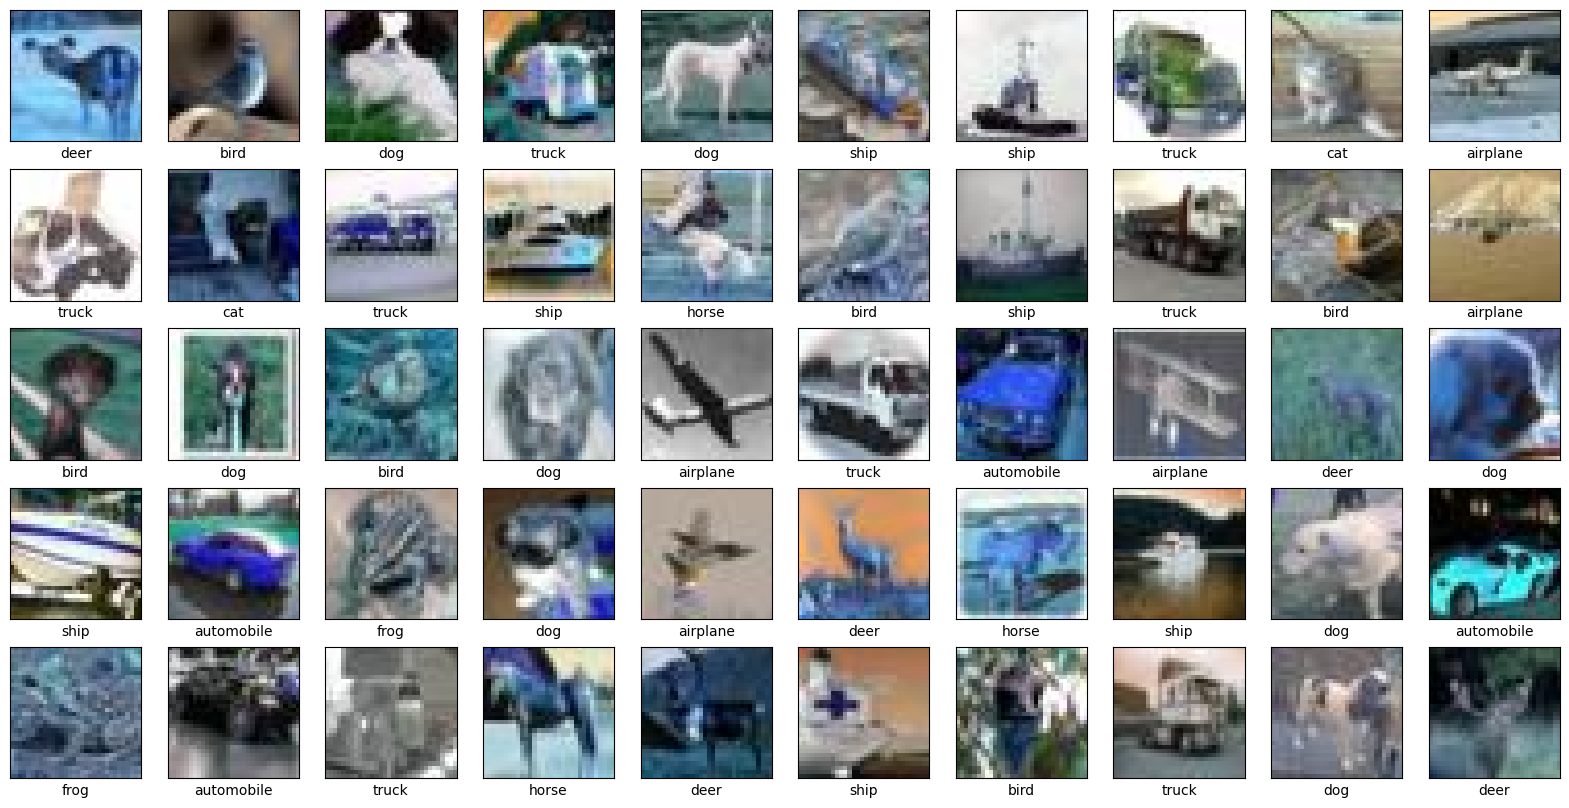

In [4]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [5]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [39]:
import math 
num_folds = 5
k_choices = [3, 5, 8, 10, 15]

l1_Accuracies = []
l2_Accuracies = []

for i in range(5):
    if i==0:
        train = f1+f2+f3+f4
        validation = f0
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
    elif i==2:
        train = f0+f1+f3+f4
        validation = f2
    elif i==3:
        train = f0+f1+f2+f4
        validation = f3
    elif i==4:
        train = f0+f1+f2+f3
        validation = f4

    l1_accuracies = []
    l2_accuracies = []
  
    for k in k_choices:
        l1_correct = 0
        l2_correct = 0
        total = 0
        for v in tqdm(validation):
            l1_scores = []
            l2_scores = []
            for t in train:
                
                # L1 distance
                l1_dist = np.sum(t[0]-v[0])
                l1_scores.append((l1_dist, t[1]))
                # L2 distance
                l2_dist = np.sum(np.sqrt(t[0]**2-v[0]**2))
                l2_scores.append((l2_dist, t[1]))
                                 
                                 
            sorted_scoresl1 = sorted(l1_scores, key=lambda a: a[0])
            l1_neighbors = [s[1] for s in sorted_scoresl1]
            l1_prediction = max(set(l1_neighbors), key=l1_neighbors.count)

            sorted_scoresl2 = sorted(l2_scores, key=lambda a: a[0])
            l2_neighbors = [s[1] for s in sorted_scoresl2]
            l2_prediction = max(set(l2_neighbors), key=l2_neighbors.count)
            if l1_prediction == v[1]:
                l1_correct += 1
            if l2_prediction == v[1]:
                l2_correct += 1

            total += 1

        l1_accuracy = l1_correct / total
        l1_accuracies.append(l1_accuracy)

        l2_accuracy = l2_correct / total
        l2_accuracies.append(l2_accuracy)
        
        print(f"l1 Accuracy: {l1_accuracy * 100 :.2f}%")
        print(f"l2 Accuracy: {l2_accuracy * 100 :.2f}%")
        

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:00<00:00,  2.38it/s]


l1 Accuracy: 10.80%
l2 Accuracy: 10.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:54<00:00,  2.41it/s]


l1 Accuracy: 10.80%
l2 Accuracy: 10.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:57<00:00,  2.40it/s]


l1 Accuracy: 10.80%
l2 Accuracy: 10.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:57<00:00,  2.40it/s]


l1 Accuracy: 10.80%
l2 Accuracy: 10.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:57<00:00,  2.39it/s]


l1 Accuracy: 10.80%
l2 Accuracy: 10.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:51<00:00,  2.43it/s]


l1 Accuracy: 11.40%
l2 Accuracy: 11.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:56<00:00,  2.40it/s]


l1 Accuracy: 11.40%
l2 Accuracy: 11.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:55<00:00,  2.41it/s]


l1 Accuracy: 11.40%
l2 Accuracy: 11.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:13<00:00,  2.31it/s]


l1 Accuracy: 11.40%
l2 Accuracy: 11.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:59<00:00,  2.38it/s]


l1 Accuracy: 11.40%
l2 Accuracy: 11.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:56<00:00,  2.40it/s]


l1 Accuracy: 10.90%
l2 Accuracy: 10.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:53<00:00,  2.42it/s]


l1 Accuracy: 10.90%
l2 Accuracy: 10.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:55<00:00,  2.41it/s]


l1 Accuracy: 10.90%
l2 Accuracy: 10.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:01<00:00,  2.37it/s]


l1 Accuracy: 10.90%
l2 Accuracy: 10.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:00<00:00,  2.38it/s]


l1 Accuracy: 10.90%
l2 Accuracy: 10.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:55<00:00,  2.41it/s]


l1 Accuracy: 10.60%
l2 Accuracy: 10.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:54<00:00,  2.41it/s]


l1 Accuracy: 10.60%
l2 Accuracy: 10.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:58<00:00,  2.39it/s]


l1 Accuracy: 10.60%
l2 Accuracy: 10.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:01<00:00,  2.37it/s]


l1 Accuracy: 10.60%
l2 Accuracy: 10.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:05<00:00,  1.65it/s]


l1 Accuracy: 10.60%
l2 Accuracy: 10.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:16<00:00,  1.62it/s]


l1 Accuracy: 10.90%
l2 Accuracy: 10.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:16<00:00,  1.62it/s]


l1 Accuracy: 10.90%
l2 Accuracy: 10.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:01<00:00,  1.66it/s]


l1 Accuracy: 10.90%
l2 Accuracy: 10.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:24<00:00,  1.77it/s]


l1 Accuracy: 10.90%
l2 Accuracy: 10.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:54<00:00,  1.87it/s]

l1 Accuracy: 10.90%
l2 Accuracy: 10.90%


ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

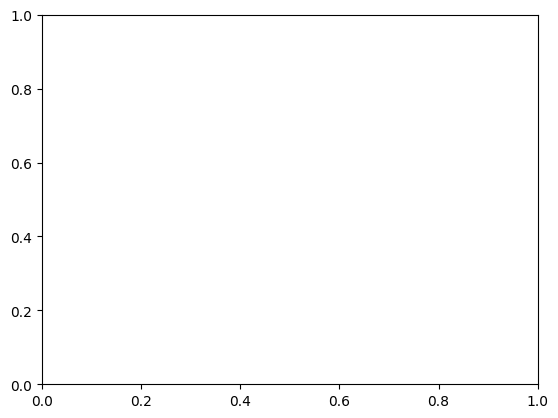

In [ ]:
    min_l1_accuracy = min(l1_accuracies)
    max_l1_accuracy = max(l1_accuracies)
    l1_Accuracy = (min_l1_accuracy + max_l1_accuracy) / 2
    l1_Accuracies.append(l1_Accuracy)

    min_l2_accuracy = min(l2_accuracies)
    max_l2_accuracy = max(l2_accuracies)
    
    l2_Accuracy = (min_l2_accuracy + max_l2_accuracy) / 2
    l2_Accuracies.append(l2_Accuracy)

 
    plt.plot(k_choices, l1_Accuracies, label='L1 distance')
    plt.plot(k_choices, l2_Accuracies, label='L2 distance')
    plt.xlabel('k')
    plt.ylabel('Midpoint accuracy')
    plt.title('KNN performance on CIFAR-10')
    plt.legend()
    plt.show()